In [ ]:
# u-net model
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

def unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.summary()

    return model


In [ ]:

from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import glob

In [ ]:
print(os.listdir("/content/drive/MyDrive/unet/new/"))

['all', 'train', 'valid', 'test', 'Untitled0.ipynb']


In [ ]:
SIZE = 256  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/unet/new/train/*"):
      if directory_path.endswith(".jpg"):
          # print(directory_path)
          img_path=directory_path

          img = cv2.imread(img_path, cv2.IMREAD_COLOR)
          img = cv2.resize(img, (SIZE, SIZE))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          train_images.append(img)
          # print(img_path)

          label_path=img_path.replace(".jpg", "_mask.png")
          # print(label_path)
          label = cv2.imread(label_path)
          label = cv2.resize(label, (SIZE, SIZE))
          label=cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
          train_labels.append(label)

# plt.imshow(train_images[10])
# plt.imshow(train_labels[1]*255)
#Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/unet/new/valid/*"):
    if directory_path.endswith(".jpg"):
          # print(directory_path)
          img_path=directory_path

          img = cv2.imread(img_path, cv2.IMREAD_COLOR)
          img = cv2.resize(img, (SIZE, SIZE))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          test_images.append(img)
          # print(img_path)

          label_path=img_path.replace(".jpg", "_mask.png")
          # print(label_path)
          label = cv2.imread(label_path)
          label = cv2.resize(label, (SIZE, SIZE))
          label=cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
          test_labels.append(label)

# plt.imshow(test_images[3])
# plt.imshow(test_labels[3]*255)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
X_train, Y_train, X_test, Y_test = train_images, train_labels, test_images, test_labels

In [ ]:
# Normalize pixel values to between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

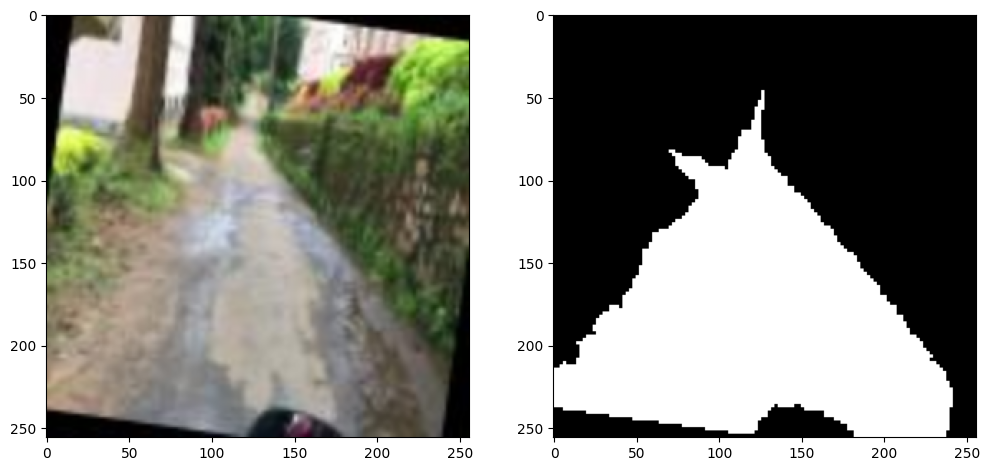

In [ ]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (SIZE, SIZE,3)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(Y_train[image_number]*255, (SIZE, SIZE,1)), cmap='gray')
plt.show()

In [ ]:
IMG_HEIGHT = SIZE
IMG_WIDTH  = SIZE
IMG_CHANNELS = 3


model = unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)


my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/unet/new/model.{epoch:02d}-{val_loss:.2f}.h5',save_best_only=True,),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_test, Y_test),
                    shuffle=False,
                    callbacks=my_callbacks)

model.save('road.hdf5')

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_437 (Conv2D)         (None, 256, 256, 16)         448       ['input_24[0][0]']            
                                                                                                  
 dropout_207 (Dropout)       (None, 256, 256, 16)         0         ['conv2d_437[0][0]']          
                                                                                                  
 conv2d_438 (Conv2D)         (None, 256, 256, 16)         2320      ['dropout_207[0][0]']         
                                                                                           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 12s 221ms/step - loss: 0.7088 - accuracy: 0.6043 - val_loss: 0.6527 - val_accuracy: 0.7515
Epoch 2/50
19/19 [==============================] - 4s 202ms/step - loss: 0.6086 - accuracy: 0.7663 - val_loss: 0.5252 - val_accuracy: 0.7500
Epoch 3/50
19/19 [==============================] - 4s 198ms/step - loss: 0.3752 - accuracy: 0.8480 - val_loss: 0.4713 - val_accuracy: 0.7657
Epoch 4/50
19/19 [==============================] - 4s 198ms/step - loss: 0.3639 - accuracy: 0.8475 - val_loss: 0.3464 - val_accuracy: 0.8499
Epoch 5/50
19/19 [==============================] - 4s 192ms/step - loss: 0.2919 - accuracy: 0.8885 - val_loss: 0.4073 - val_accuracy: 0.8177
Epoch 6/50
19/19 [==============================] - 4s 187ms/step - loss: 0.2932 - accuracy: 0.8873 - val_loss: 0.4255 - val_accuracy: 0.8322
Epoch 7/50
19/19 [==============================] - 4s 198ms/step - loss: 0.2953 - accuracy: 0.8950 - val_loss: 0.2345 - val_accuracy: 0.9159
Epoch 8/50
19/19

1/1 [==============================] - 0s 88ms/step - loss: 0.2730 - accuracy: 0.9001
Accuracy =  90.01407027244568 %


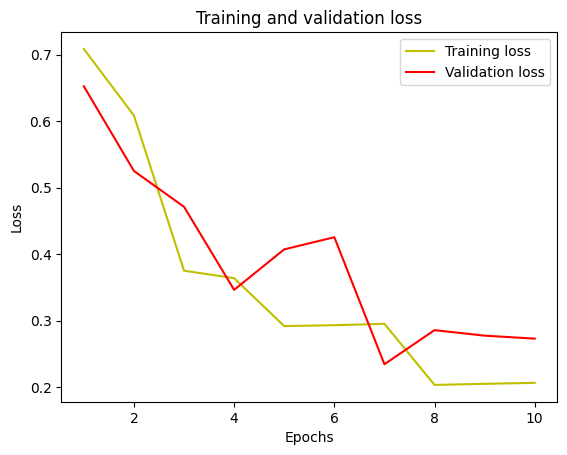

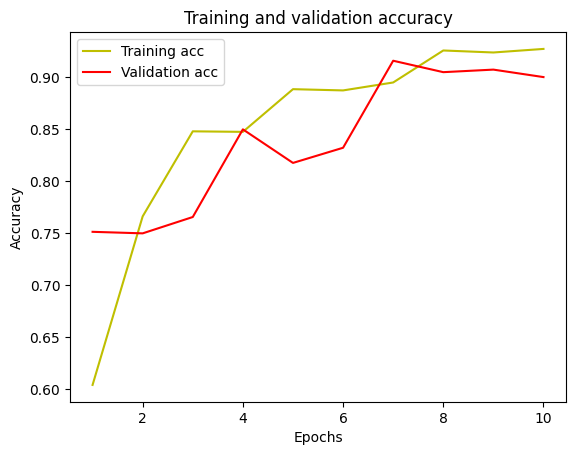

In [ ]:
#Evaluate the model


	# evaluate model
_, acc = model.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

y_pred_thresholded = np.squeeze(y_pred_thresholded, axis=-1)

# Now perform the logical operations
intersection = np.logical_and(Y_test, y_pred_thresholded)
union = np.logical_or(Y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)

print("Intersection over Union (IoU) score:", iou_score)

1/1 [==============================] - 0s 266ms/step
Intersection over Union (IoU) score: 0.8141660595806014


Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_33 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_608 (Conv2D)         (None, 256, 256, 16)         448       ['input_33[0][0]']            
                                                                                                  
 dropout_288 (Dropout)       (None, 256, 256, 16)         0         ['conv2d_608[0][0]']          
                                                                                                  
 conv2d_609 (Conv2D)         (None, 256, 256, 16)         2320      ['dropout_288[0][0]']         
                                                                                           

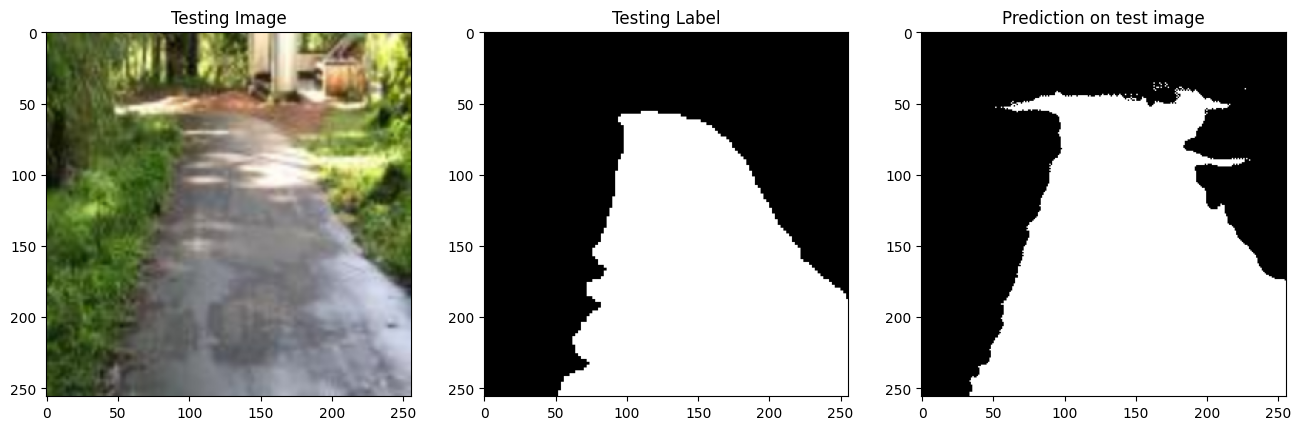

In [ ]:
test_images_new = []
test_labels_new = []
for directory_path in glob.glob("/content/drive/MyDrive/unet/new/test/*"):
    if directory_path.endswith(".jpg"):
          # print(directory_path)
          img_path=directory_path

          img = cv2.imread(img_path, cv2.IMREAD_COLOR)
          img = cv2.resize(img, (SIZE, SIZE))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          test_images_new.append(img)
          # print(img_path)

          label_path=img_path.replace(".jpg", "_mask.png")
          # print(label_path)
          label = cv2.imread(label_path)
          label = cv2.resize(label, (SIZE, SIZE))
          label=cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
          test_labels_new.append(label)


#Predict on a few images
model = get_model()
model.load_weights('road.hdf5')


test_img_number1 = random.randint(0, len(test_images_new)-1)
test_img1 = test_images_new[test_img_number1]
ground_truth=test_labels_new[test_img_number1]
test_img_norm=test_img1[:,:,:][:,:,:,None]

test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)


plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img1[:,:,:], cmap='gray')
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:], cmap='gray')
plt.subplot(133)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()


